# Support Vector Machine

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [5]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.70, random_state=0)

In [6]:
X

array([[ 1.30574069,  1.63577987],
       [ 1.77304366,  1.75337521],
       [ 1.50899649,  4.38895984],
       [ 2.02212543,  4.16017654],
       [ 2.10182958,  1.10939399],
       [ 2.852848  ,  0.03328559],
       [ 3.37347301, -0.04576768],
       [ 2.06261754,  2.14777301],
       [ 2.03553996,  1.19749597],
       [-0.21811905,  5.6693301 ],
       [ 1.83747356,  5.14545322],
       [ 0.09931333,  4.84803058],
       [ 1.08473328,  4.56850109],
       [ 1.44570952,  0.49246889],
       [ 1.58137542,  3.78427181],
       [ 1.19541747,  3.70592031],
       [ 0.70514131,  4.0921754 ],
       [ 2.33690667,  0.4182966 ],
       [ 0.35482006,  2.9172298 ],
       [ 0.90401688,  4.59120628],
       [ 1.61124206,  0.64374484],
       [ 2.304724  ,  1.39226488],
       [ 1.42015867,  0.93402544],
       [ 1.58454521,  0.64597645],
       [ 2.56563091,  0.9879517 ],
       [ 2.56509832,  3.28573136],
       [ 0.61951355,  3.99713532],
       [-0.81082279,  4.76132034],
       [ 2.17946582,

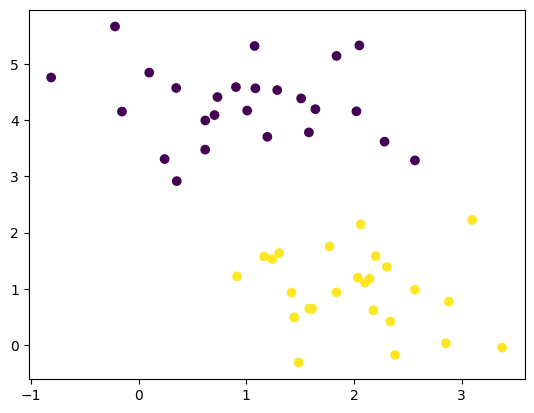

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [9]:
X_train

array([[ 2.14410599,  1.17905621],
       [ 2.28356067,  3.61969281],
       [ 0.91412868,  1.22161124],
       [-0.81082279,  4.76132034],
       [ 1.16592802,  1.57624136],
       [ 1.58137542,  3.78427181],
       [-0.15345841,  4.15486913],
       [ 2.304724  ,  1.39226488],
       [ 1.30574069,  1.63577987],
       [ 1.19541747,  3.70592031],
       [ 2.20106001,  1.58131099],
       [ 1.42015867,  0.93402544],
       [ 2.38123123, -0.17770692],
       [ 1.44570952,  0.49246889],
       [ 3.37347301, -0.04576768],
       [ 0.242283  ,  3.30977477],
       [ 2.88041322,  0.77171627],
       [ 2.17946582,  0.616417  ],
       [ 0.61870648,  3.4773448 ],
       [ 1.28697434,  4.53735936],
       [ 1.61124206,  0.64374484],
       [ 1.83747356,  5.14545322],
       [ 0.35482006,  2.9172298 ],
       [ 3.09704406,  2.22478608],
       [ 2.04921553,  5.33233847],
       [ 1.77304366,  1.75337521],
       [ 1.48606512, -0.31073416],
       [ 2.33690667,  0.4182966 ],
       [ 0.09931333,

In [42]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
sv = model.support_vectors_

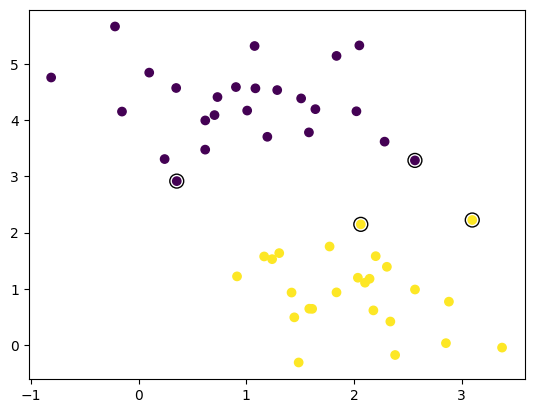

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(sv[:, 0], sv[:, 1], s=100, marker='o', edgecolors='k', facecolors='none')

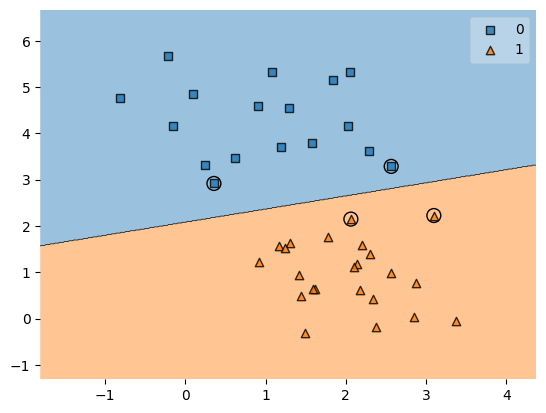

In [14]:
plot_decision_regions(X_train, y_train, clf=model)
plt.scatter(sv[:, 0], sv[:, 1], s=100, marker='o', edgecolors='k', facecolors='none')

In [19]:
w = model.coef_[0]
b = model.intercept_[0]

print(w, b)

[ 0.38537548 -1.36215247] 2.8369722331706546


In [22]:
print(f'Line equation: ({w[0]})*x1 + ({w[1]})*x2 + ({b}) = 0')

Line equation: (0.38537548142358413)*x1 + (-1.3621524666566893)*x2 + (2.8369722331706546) = 0


In [29]:
# now how to get the distance of line from the support vector ?

import numpy as np

norm_w = np.linalg.norm(w) # (a^2 + b^2) ^1/2

# |w * x| / (a^2 + b^2) ^1/2

distances = np.abs(np.dot(X_train, w) + b) / norm_w


print(norm_w)
print(distances)

sorted_distance = sorted(distances)
print(sorted_distance[:4])

1.415617746463134
[1.45321983 0.85727448 1.07743369 2.79817292 0.80474497 1.20679445
 2.03567108 1.29178892 0.7855165  1.23647198 1.08166215 1.49191511
 2.82329343 1.92375062 2.96645658 1.11476118 2.04562117 2.00423524
 1.17352813 2.01158445 1.82325122 2.44684861 0.7064058  0.70640484
 2.56903274 0.79957702 2.70760423 2.23773334 2.63384071 1.50874208
 3.5105363  2.82351201 1.44851599 0.45928277 0.49890598 2.16765069
 1.75185897 2.74865858 0.87100415 1.81383619]
[0.4592827693622699, 0.498905981748989, 0.7064048393015475, 0.7064057985912136]


In [35]:
# !pip install -U yellowbrick

YellowbrickAttributeError: neither visualizer 'DecisionBoundariesVisualizer' nor wrapped estimator 'SVC' have attribute 'features'

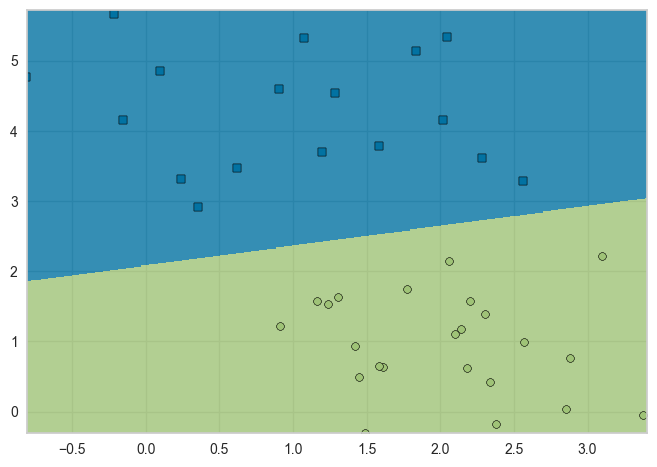

In [43]:
from yellowbrick.contrib.classifier import DecisionViz

viz = DecisionViz(model)
viz.fit(X_train, y_train)
viz.draw(X_train, y_train)
viz.show